# KMeans Clustering

Confusion Matrix:
 [[     0      0      0      0      0]
 [    65   6218    138   2846      0]
 [  2397 436910   7482 383805      0]
 [   256  87679   1039  80240      0]
 [    48  10656    203  14193      0]]


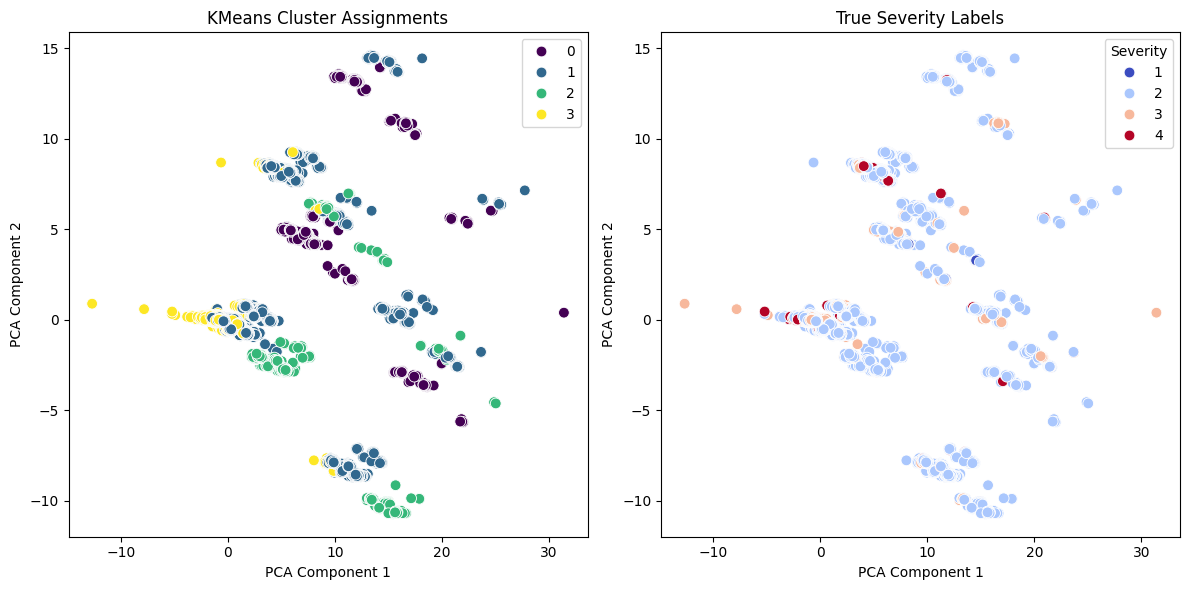

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

# Load the CSV file
data = pd.read_csv("Test_Set.csv")

# Define features and target variable
X = data.drop(columns=["Severity"])  # All columns except 'Severity'
y = data["Severity"]  # Target variable 'Severity'

# Create and fit the KMeans model
n_clusters = 4  # Since 'Severity' has values from 1 to 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

# Get cluster assignments
cluster_labels = kmeans.labels_

# Compare results with a confusion matrix
conf_matrix = confusion_matrix(y, cluster_labels)
print("Confusion Matrix:\n", conf_matrix)

# Plot the clustering results
# First, reduce the data to 2 dimensions for plotting using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot with clusters and true Severity labels
plt.figure(figsize=(12, 6))

# Plot clusters based on KMeans labels
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="viridis", s=60)
plt.title("KMeans Cluster Assignments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot actual Severity values for comparison
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm", s=60)
plt.title("True Severity Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()


# DBSCAN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# load CSV-Datei 
data = pd.read_csv("Test_Set.csv", nrows=100)

# Remove the ‘Severity’ column as it is not needed 
numeric_data = data.drop(columns=["Severity"])

# Perform hierarchical clustering
Z = linkage(numeric_data, 'complete')  # ‘complete’ is the complete linkage method

# plot Dendrogramm 
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Plot the dendrogram with the labels (line indices of the DataFrame)
dendrogram(Z, labels=list(data.index))

# show Plot
plt.show()


: 